In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales_data_sample.csv',encoding= 'unicode_escape')

In [3]:
df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


In [4]:
# Let's check some informations about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


There are some NaN values, so let drop those columns that have NaN values.

In [5]:

df = df.drop(['STATE', 'POSTALCODE', 'ADDRESSLINE2', 'YEAR_ID'], axis=1)
# Here, I droped YEAR_ID column too.

In [6]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,Motorcycles,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,Motorcycles,...,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,Motorcycles,...,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,Motorcycles,...,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,Motorcycles,...,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,USA,NaN,Brown,Julie,Medium


In [7]:
# Here, I am interested to know the sales of motorcycles in NYC city.
df1 = df[df['PRODUCTLINE']=='Motorcycles']
df1 = df1[df1['CITY']=='NYC'].sort_values(by='SALES', ascending=False)

In [8]:
df1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,PRODUCTLINE,...,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
91,10237,39,100.0,9,7023.90,4/5/2004 0:00,Shipped,2,4,Motorcycles,...,S10_4698,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,USA,NaN,Frick,Michael,Large
80,10107,27,100.0,4,6065.55,2/24/2003 0:00,Shipped,1,2,Motorcycles,...,S10_4698,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Medium
99,10329,26,100.0,3,5868.20,11/15/2004 0:00,Shipped,4,11,Motorcycles,...,S10_4698,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Medium
823,10329,38,100.0,12,5266.04,11/15/2004 0:00,Shipped,4,11,Motorcycles,...,S18_2625,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Medium
19,10329,42,100.0,1,4396.14,11/15/2004 0:00,Shipped,4,11,Motorcycles,...,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,USA,NaN,Yu,Kwai,Medium


In [9]:
# Now, suppose we want to know how much sales happen for the given order date.
os_group = df1[['ORDERDATE','SALES','PRODUCTLINE','CITY']]
os_group.head(10)

,ORDERDATE,SALES,PRODUCTLINE,CITY
91,4/5/2004 0:00,7023.90,Motorcycles,NYC
80,2/24/2003 0:00,6065.55,Motorcycles,NYC
99,11/15/2004 0:00,5868.20,Motorcycles,NYC
823,11/15/2004 0:00,5266.04,Motorcycles,NYC
19,11/15/2004 0:00,4396.14,Motorcycles,NYC
251,4/5/2004 0:00,4193.28,Motorcycles,NYC
258,11/3/2004 0:00,4111.80,Motorcycles,NYC
54,2/24/2003 0:00,3896.49,Motorcycles,NYC
259,11/15/2004 0:00,3542.64,Motorcycles,NYC
1583,11/15/2004 0:00,3493.91,Motorcycles,NYC


<AxesSubplot:xlabel='ORDERDATE'>

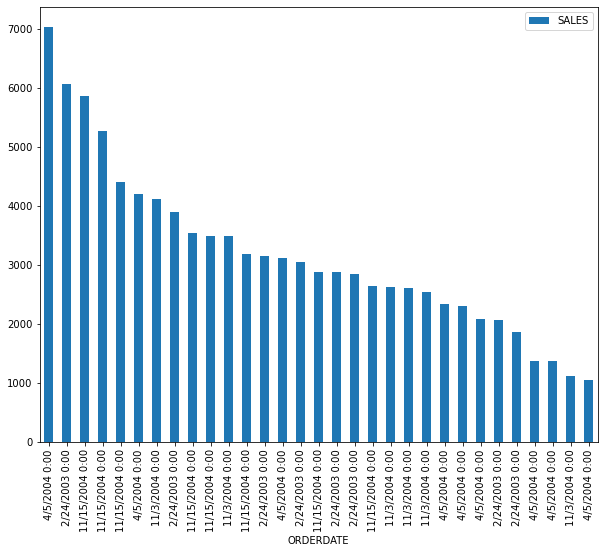

In [10]:
os_group.plot(kind='bar', x='ORDERDATE', y='SALES', figsize=(10,8))

So, 7023.90 is the highest sales on 4/5/2004 in NYC.

From the above graph, we can notice that 2004 is an especial year in the dataset because lots of motorcycles are purchased, especially on November 3 and November 15.


In [11]:
# Let's see sales of some other cities
other = df[['ORDERDATE','SALES','PRODUCTLINE','CITY']]

In [12]:
other = other[other['PRODUCTLINE']=='Motorcycles'].sort_values(by='SALES', ascending=False)

In [13]:
other.head()

,ORDERDATE,SALES,PRODUCTLINE,CITY
104,4/8/2005 0:00,11886.60,Motorcycles,Liverpool
90,2/20/2004 0:00,9774.03,Motorcycles,Melbourne
81,4/29/2003 0:00,9264.86,Motorcycles,Melbourne
105,5/13/2005 0:00,9218.16,Motorcycles,Madrid
86,11/11/2003 0:00,8892.90,Motorcycles,Lille


Text(0.5, 1.0, 'Sales per Orderdate of Motorcycles')

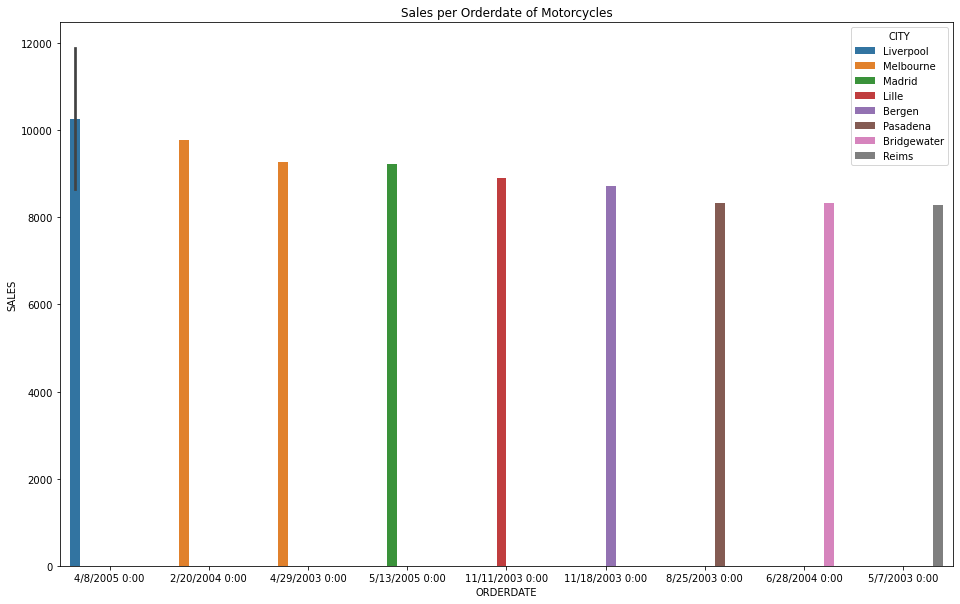

In [22]:
# from the above, we can see that 11886.60 is the highest sales on 4/8/2005 in Liverpool city.
# The second highest sales is 9774.03 on 2/20/2004 in Melbourne city.
# The Third highest sales is 9264.86 on 4/29/2003 in Melbourne city.
# The fourth highest sales is 9218.16 on 5/13/2005 in Madrid city.
# And the last not least sales is 8892.90 0n 11/11/2003 in Lille city.
import seaborn as sns
plt.figure(figsize=(16,10))
sns.barplot(data=other[:10], x='ORDERDATE', y='SALES', hue='CITY')
plt.title('Sales per Orderdate of Motorcycles')

# df1=df1.drop('STATE',axis=1)